## MNIST CNN tensorflow1.x 

- 499 ~ 537


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflo

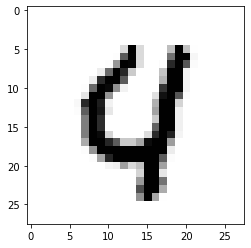

In [ ]:
# ont_hot 인코딩 형태로 mnist data로드
mnist = input_data.read_data_sets("./mnist",one_hot = True)

# 이미지 한개 받아오기
X, y = mnist.train.next_batch(1)

# 불러온 데이터 확인
print("X.shape:",X.shape)

# 확인하기위해선 shape을 줘야함
plt.imshow(X.reshape(28, 28), cmap='Greys')

# X.shape 변경
X = X.reshape(1, 28, 28, 1)
print("X.reshape", X.shape)

In [ ]:
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# 필터 선언
w1 = tf.Variable(initializer([3, 3, 1 ,32]))
print("w1.shape: ", w1.shape)

# 합성곱 연산
convolution_h1 = tf.nn.conv2d(X, w1, strides=1, padding="SAME")
convolution_h1.shape

# 활성화 함수 relu 적용
convolution_h1 = tf.nn.relu(convolution_h1)
convolution_h1.shape

# 필터 선언
w2 = tf.Variable(initializer([3, 3, 32 ,64]))
w2.shape

# 합성곱 연산
convolution_h2 = tf.nn.conv2d(convolution_h1, w2, strides=1, padding="SAME")
convolution_h2.shape

# 활성화 함수 적용
convolution_h2 = tf.nn.relu(convolution_h2)
convolution_h2.shape

# 맥스풀링
# 강의 자료에서 맥스풀링하고 렐루하는거 의미 없음
convolution_h2 = tf.nn.max_pool(convolution_h2, ksize=2, strides=1, padding="SAME")
convolution_h2.shape

# 선형 회귀를 하기 위해 2차원 배열로 변환
convolution_h2 = tf.reshape(convolution_h2, [-1, 28 * 28 * 64])
convolution_h2.shape

# 필터 선언
w3 = tf.Variable(initializer([28 * 28 * 64, 512]))
w3.shape

# 
y_h1 = tf.matmul(convolution_h2, w3)
y_h1.shape

y_h1 = tf.nn.relu(y_h1)
y_h1.shape

# 필터 선언
w4 = tf.Variable(initializer([512, 10]))
w4.shape

# 선형 회귀
y_h2 = tf.matmul(y_h1, w4)
y_h2.shape

# 활성화 함수 적용
y_h2 = tf.nn.softmax(y_h2)
y_h2

w1.shape:  (3, 3, 1, 32)


<tf.Tensor: id=68, shape=(1, 10), dtype=float32, numpy=
array([[0.10908398, 0.10549286, 0.09282257, 0.09578682, 0.10544601,
        0.0983581 , 0.10947377, 0.08777595, 0.11173313, 0.0840268 ]],
      dtype=float32)>

In [ ]:
# mnist 전체 데이터수
print("mnist 전체 데이터수 :",mnist.train.num_examples)

# 한번에 100개씩 학습
batch_size = 100

# 한번에 100개씩 학습하면 전체 학습할려면 550번 돌려야함
total_batch = int(mnist.train.num_examples / batch_size)

optimizer = tf.train.AdamOptimizer(0.001)

mnist 전체 데이터수 : 55000


In [ ]:
# epochs = 5
for step in range(5):
  total_cost = 0

  for i in range(total_batch):

      # 100 개씩 로드
      X, y = mnist.train.next_batch(100)

      # 학습을 위해 4차원으로 변환
      # 이미지 100장, 28 * 28, 채널은 1
      X = X.reshape(100, 28,28,1)

      with tf.GradientTape() as tape:

        # 1차 합성곱 연산합
        convolution_h1 = tf.nn.relu(tf.nn.conv2d(X, w1, strides = 1, padding = "SAME"))

        # 2차 합성곱 연산합  
        convolution_h2 = tf.nn.relu(tf.nn.conv2d(convolution_h1, w2, strides = 1, padding = "SAME"))

        # maxpool
        convolution_h2 = tf.nn.max_pool(convolution_h2, ksize = 2, strides = 1,  padding = 'SAME')

        # 2차원 배열로 reshape
        convolution_h2 = tf.reshape(convolution_h2, [-1, 28 * 28*64])

        # 
        y_h1 = tf.nn.relu(tf.matmul(convolution_h2,w3))

        y_h2 = tf.nn.softmax(tf.matmul(y_h1,w4))

        # 오차
        cost = -tf.reduce_mean( y * tf.log(y_h2))
        print("cost =", cost)

        # 기울기 수정값
        grads =  tape.gradient(cost, [w1,w2,w3,w4])

      # 기울기 수정
      optimizer.apply_gradients(grads_and_vars = zip(grads, [w1, w2, w3, w4]))

      total_cost += cost
  print("step : {} cost {}".format(step, total_cost/total_batch))

cost = tf.Tensor(0.23098417, shape=(), dtype=float32)
cost = tf.Tensor(0.2763683, shape=(), dtype=float32)
cost = tf.Tensor(0.23283471, shape=(), dtype=float32)
cost = tf.Tensor(0.20337634, shape=(), dtype=float32)
cost = tf.Tensor(0.1656518, shape=(), dtype=float32)
cost = tf.Tensor(0.17119999, shape=(), dtype=float32)
cost = tf.Tensor(0.1494777, shape=(), dtype=float32)
cost = tf.Tensor(0.11831464, shape=(), dtype=float32)
cost = tf.Tensor(0.09666339, shape=(), dtype=float32)
cost = tf.Tensor(0.09199569, shape=(), dtype=float32)
cost = tf.Tensor(0.07085838, shape=(), dtype=float32)
cost = tf.Tensor(0.05910943, shape=(), dtype=float32)
cost = tf.Tensor(0.055959847, shape=(), dtype=float32)
cost = tf.Tensor(0.04241076, shape=(), dtype=float32)
cost = tf.Tensor(0.031090466, shape=(), dtype=float32)
cost = tf.Tensor(0.062497344, shape=(), dtype=float32)
cost = tf.Tensor(0.04706175, shape=(), dtype=float32)
cost = tf.Tensor(0.041106686, shape=(), dtype=float32)
cost = tf.Tensor(0.03317654

In [ ]:
# MNIST 테스트 이미지
test_images = mnist.test.images[0:100]

# 테스트 이미지에 대한 라벨
test_labels = mnist.test.labels[0:100]

# test_image를 차원으로 변환
test_images = test_images.reshape(-1, 28, 28, 1)

# 합성곱 연산

# 1차 합성곱 연산합
convolution_h1 = tf.nn.relu(tf.nn.conv2d(test_images, w1, strides = 1, padding = "SAME"))

# 2차 합성곱 연산합  
convolution_h2 = tf.nn.relu(tf.nn.conv2d(convolution_h1, w2, strides = 1, padding = "SAME"))

# maxpool
convolution_h2 = tf.nn.max_pool(convolution_h2, ksize = 2, strides = 1,  padding = 'SAME')

# 2차원 배열로 reshape
convolution_h2 = tf.reshape(convolution_h2, [-1, 28 * 28*64])

#
y_h1 = tf.nn.relu(tf.matmul(convolution_h2, w3))

predict = tf.nn.softmax(tf.matmul(y_h1, w4))

# 가장 최댓값의 인덱스 리턴
predict01 = tf.argmax(predict, 1)

# 테스트셋 정답 인덱스 리턴
target = tf.argmax(test_labels, 1)

# 정답과 예측 동일하면 True,  틀리면 False
ac01 = tf.equal(predict01 , target)

ac02 = tf.cast(ac01, dtype = 'float32')

ac03 = tf.reduce_mean(ac02)
print("정확도 :",ac03)

정확도 : tf.Tensor(0.99, shape=(), dtype=float32)
